In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

calls = pd.read_csv("911.csv")
%matplotlib inline

In [2]:
calls.timeStamp = pd.to_datetime(calls.timeStamp)

In [3]:
calls.title.str[:][0:5]

0     EMS: BACK PAINS/INJURY
1    EMS: DIABETIC EMERGENCY
2        Fire: GAS-ODOR/LEAK
3     EMS: CARDIAC EMERGENCY
4             EMS: DIZZINESS
Name: title, dtype: object

In [4]:
 t = calls.title.str.extract("(\w*)([:\s])(\s\w*[\s-]?[/]?\w*/?\w*)",expand = False)

In [5]:
calls["call_type"] = t[0]
calls["call_detail"] = t[2]

In [6]:
calls.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,call_type,call_detail
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS


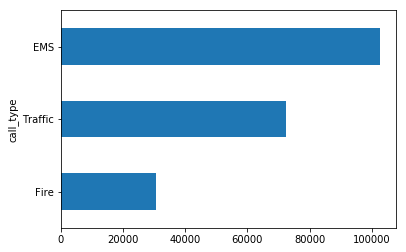

In [7]:
calls.groupby("call_type").count().title.sort_values().plot(kind = "barh")

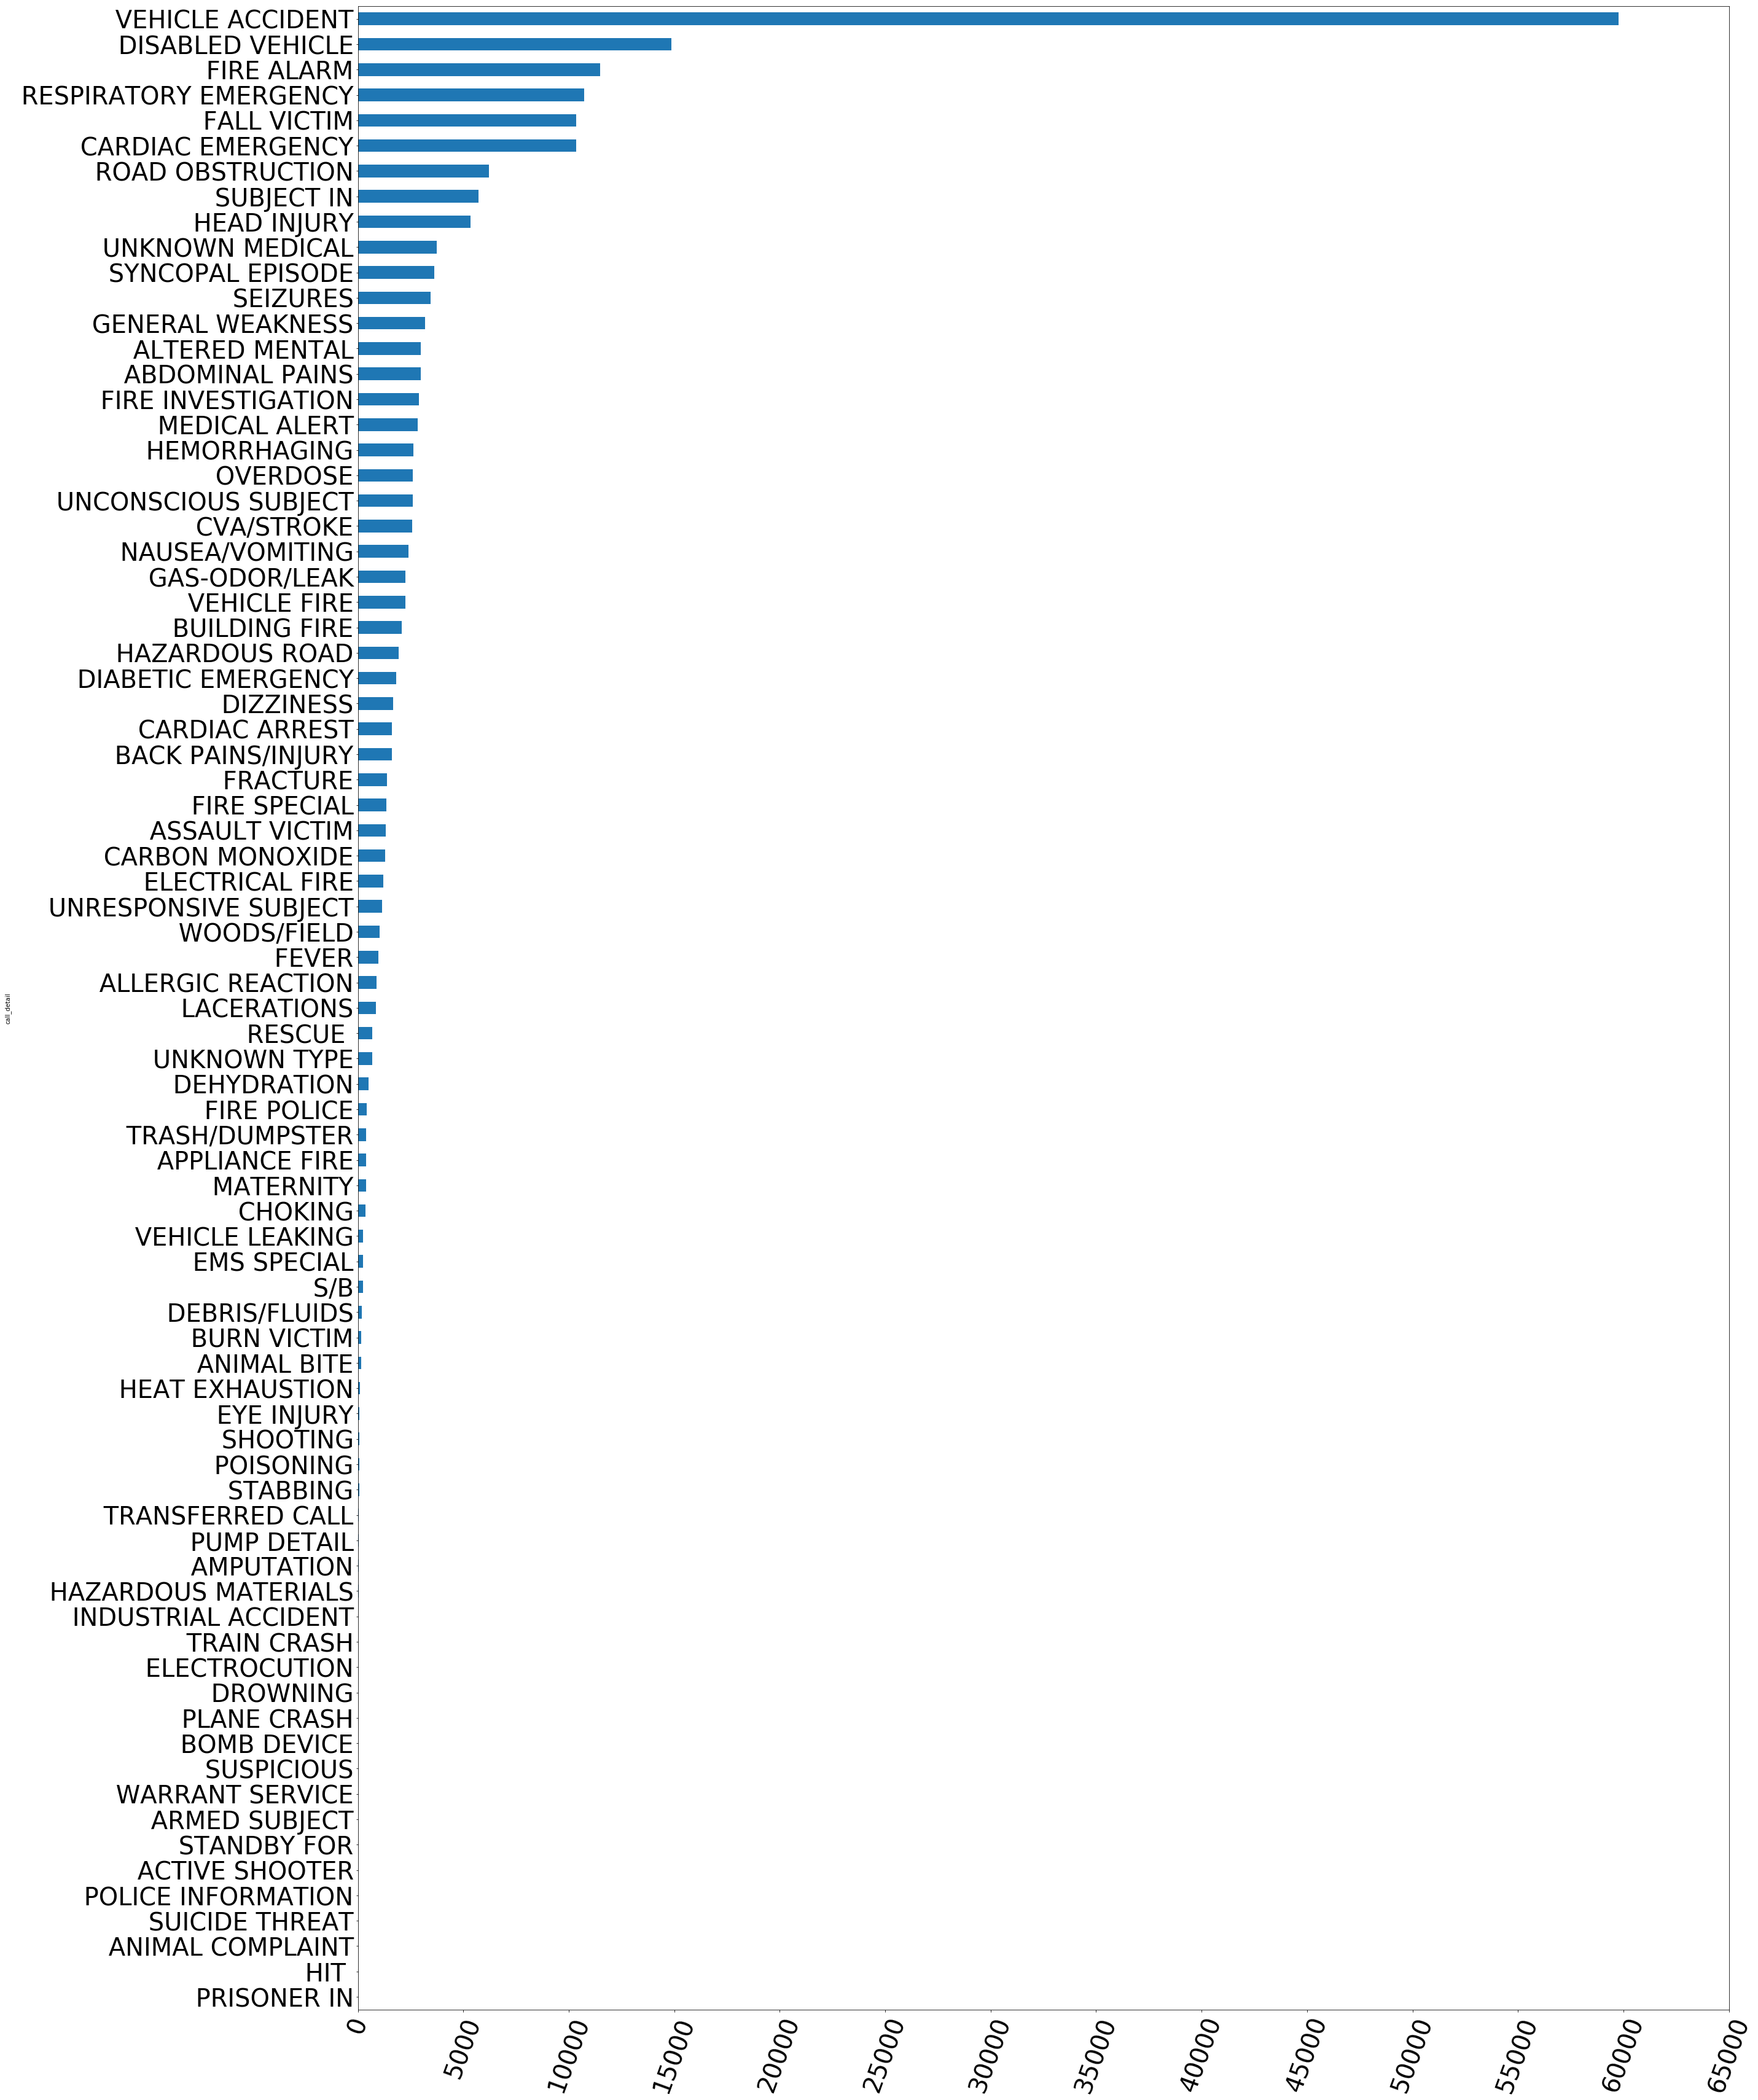

In [8]:
plt.figure(figsize = (40,60))
calls.groupby("call_detail").count().title.sort_values().plot(kind = "barh")
plt.xticks(range(0,70000,5000),rotation = 70,size = 40)
plt.yticks(size = 40)
plt.fontsize= 40

In [9]:
calls.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,call_type,call_detail
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS


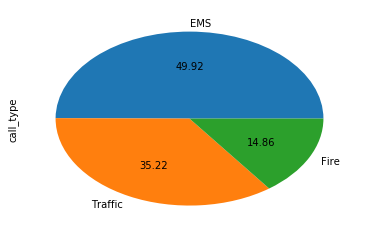

In [10]:
calls.call_type.value_counts().plot(kind = "Pie", autopct = "%.2f")

In [11]:
detailed_calls = calls.groupby("call_type").call_detail.value_counts().unstack().T

In [12]:
Emergency = detailed_calls.loc[:,"EMS"]

In [13]:
Emergency.describe()

count       72.000000
mean      1425.319444
std       2482.413886
min          1.000000
25%         10.000000
50%        122.500000
75%       1952.750000
max      10719.000000
Name: EMS, dtype: float64

In [14]:
Emergency.dropna(inplace = True)

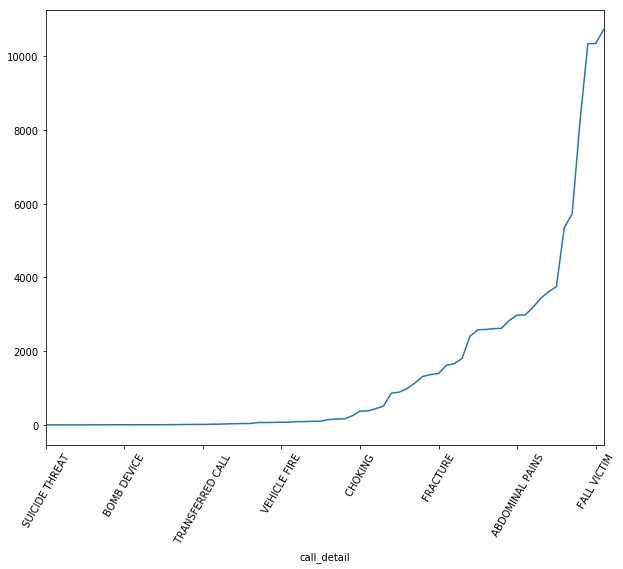

In [15]:
plt.figure(figsize = (10,8))
Emergency.sort_values().plot(rot = 60)
# plt.xticks(range(1,70))

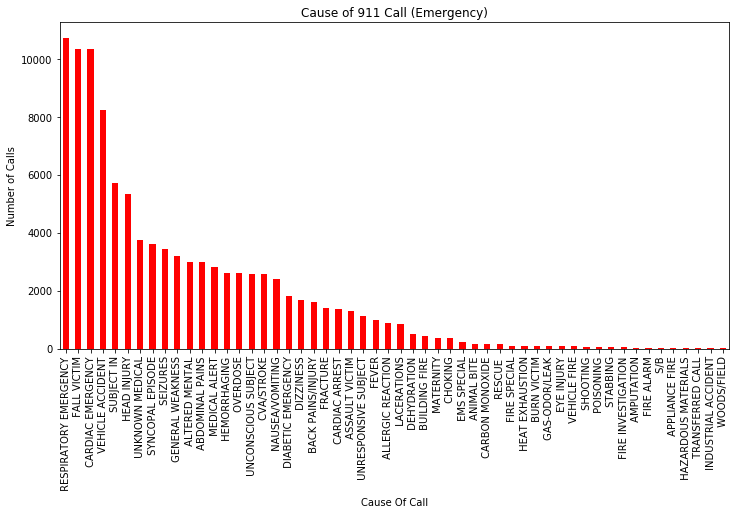

In [16]:
Emergency.sort_values(ascending = False).where(Emergency > 10).dropna().plot(kind = "bar",color = "red",figsize = (12,6))
plt.title("Cause of 911 Call (Emergency)")
plt.ylabel("Number of Calls")
plt.xlabel("Cause Of Call")

In [17]:
town_details = calls.groupby("twp").call_type.value_counts().unstack()

In [18]:
pct_town_details = town_details.div(town_details.sum(0),1)

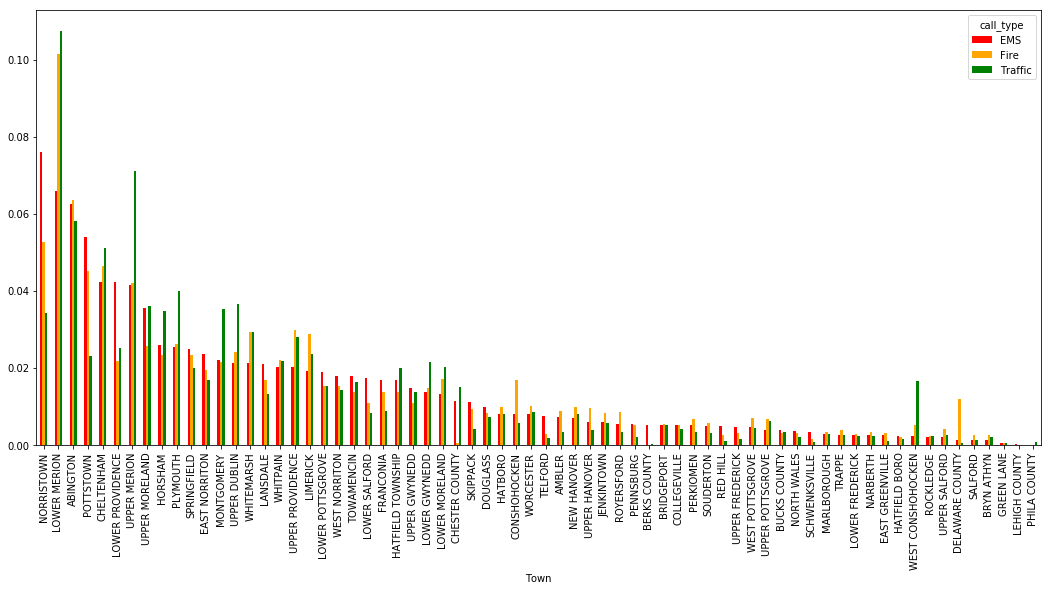

In [19]:

pct_town_details.sort_values("EMS",ascending = False).plot(kind = "bar",rot = 90,figsize = (18,8),color = ["red","orange","green"])
plt.xlabel("Town")

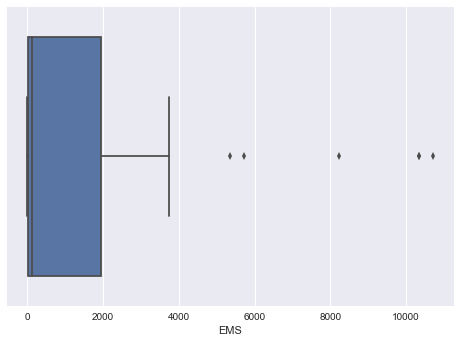

In [20]:
import seaborn as sns
sns.boxplot(Emergency)

In [21]:
Fire = detailed_calls.Fire.dropna()

In [22]:
Traffic = detailed_calls.Traffic.dropna()

In [23]:
detailed_calls.Traffic.mean()

10343.42857142857

C:\Users\Mostafa\Anaconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


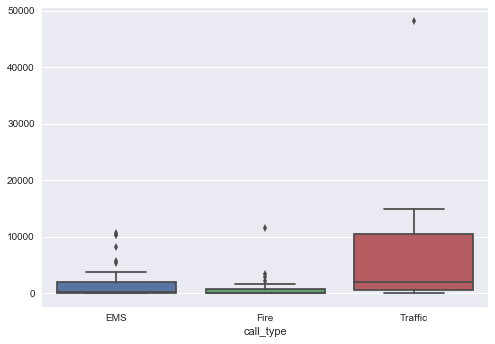

In [24]:
sns.boxplot(detailed_calls)

In [25]:
unpivot_call_types = pd.melt(calls,value_vars="call_type")

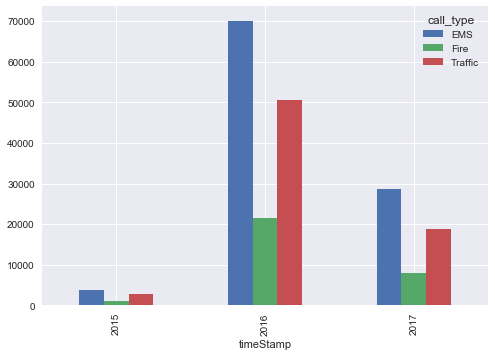

In [26]:
calls.groupby(calls.timeStamp.dt.year).call_type.value_counts().sort_values().unstack().plot(kind = "bar")

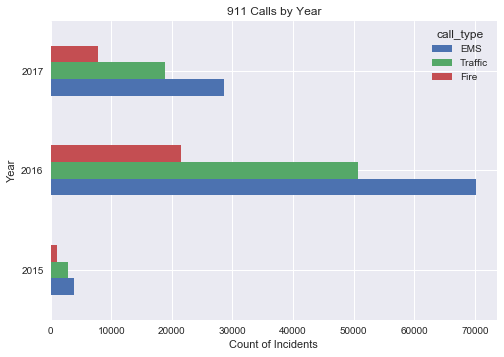

In [27]:
df = calls.groupby(calls.timeStamp.dt.year).call_type.value_counts().sort_values().unstack()
df = df[["EMS","Traffic","Fire"]]
df.plot(kind = "barh")
plt.ylabel("Year")
plt.xlabel("Count of Incidents")
plt.title("911 Calls by Year")


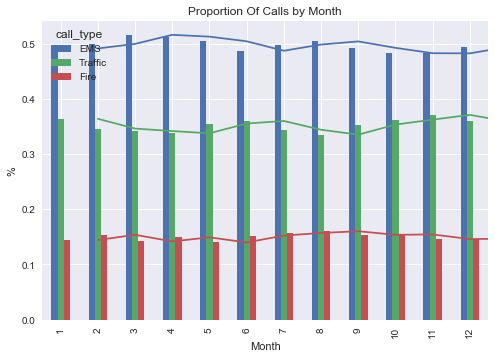

In [28]:
calls_by_month = calls.groupby([calls.timeStamp.dt.month]).call_type.value_counts().sort_index(level = 0).unstack()
calls_by_month = calls_by_month.div(calls_by_month.sum(1),0)
calls_by_month = calls_by_month[["EMS","Traffic","Fire"]]
calls_by_month.plot(kind = "bar")
plt.plot(calls_by_month.EMS)
plt.plot(calls_by_month.Traffic)
plt.plot(calls_by_month.Fire)
plt.title("Proportion Of Calls by Month")
plt.xlabel("Month")
plt.ylabel("%")

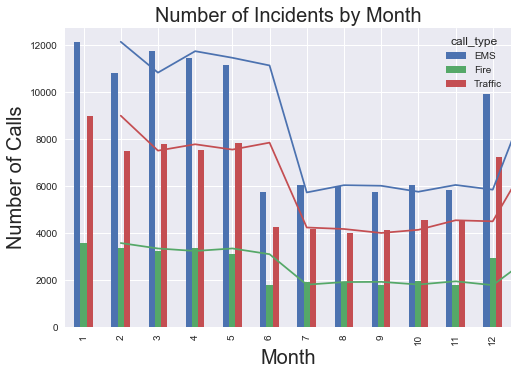

In [29]:
calls_by_month = calls.groupby([calls.timeStamp.dt.month]).call_type.value_counts().sort_index(level = 0).unstack()
calls_by_month.plot(kind ="bar")
plt.plot(calls_by_month.EMS)
plt.plot(calls_by_month.Fire)
plt.plot(calls_by_month.Traffic)
plt.xlabel("Month",size = 20)
plt.ylabel("Number of Calls",size = 20)
plt.title("Number of Incidents by Month",size = 20)

In [30]:
calls["Month"] = calls.timeStamp.dt.month
calls["Year"] = calls.timeStamp.dt.year
calls["Hour"] = calls.timeStamp.dt.hour
calls.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,call_type,call_detail,Month,Year,Hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,12,2015,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,12,2015,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,12,2015,14
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY,12,2015,16
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS,12,2015,16


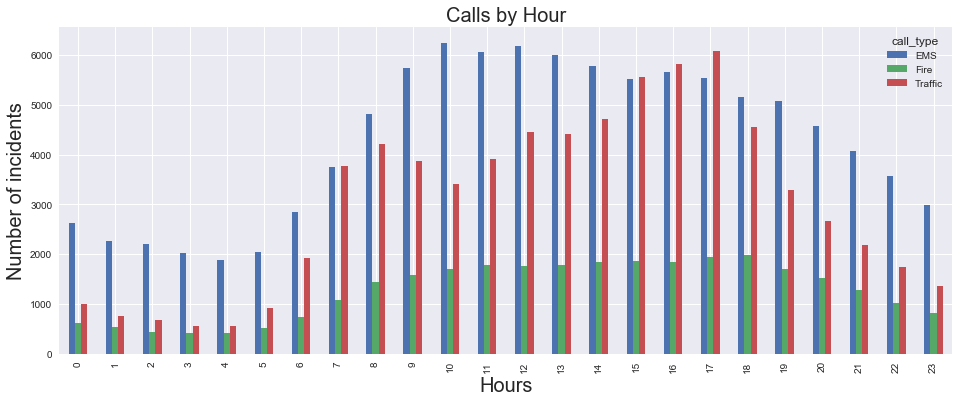

In [31]:
calls.groupby("Hour").call_type.value_counts().unstack().plot(kind = "bar",figsize = (16,6))
plt.title("Calls by Hour",size = 20)
plt.ylabel("Number of incidents",size = 20)
plt.xlabel("Hours", size = 20)

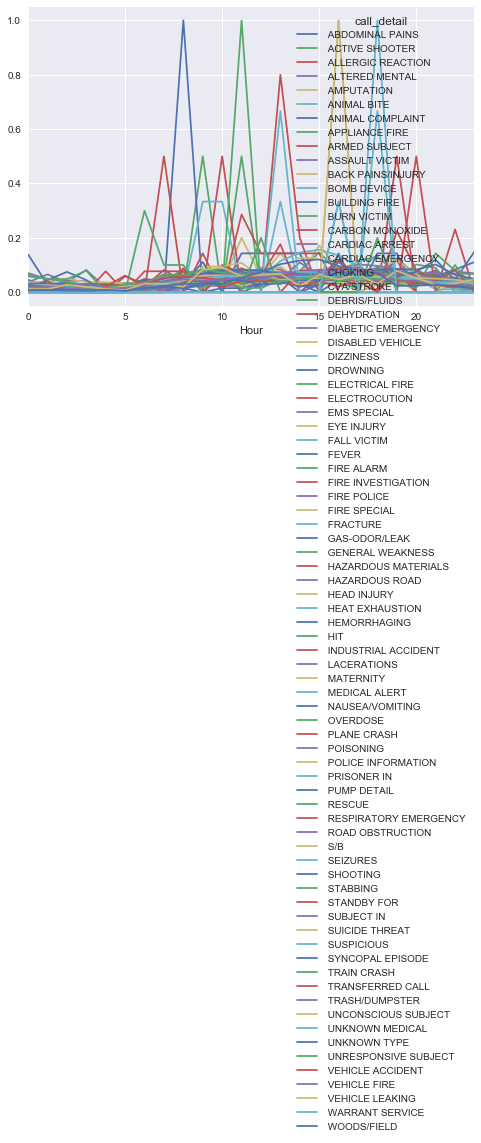

In [32]:
type_of_call= pd.crosstab(index = calls["Hour"],columns = calls["call_detail"]).T
t_o_c = type_of_call.div(type_of_call.sum(1),0)
t_o_c.T.plot()

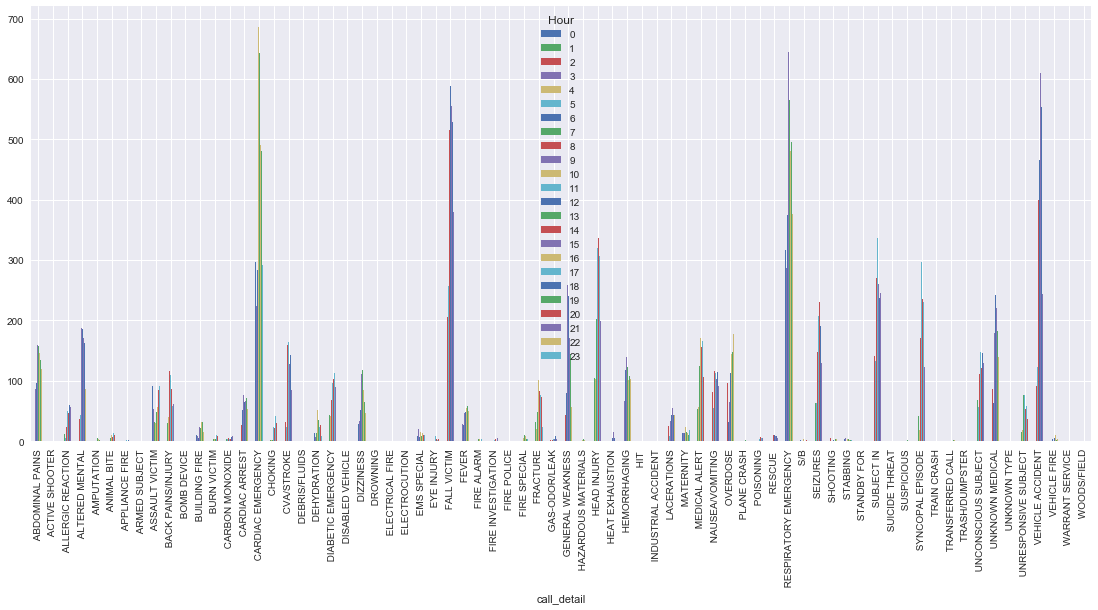

In [33]:
ems =calls[calls.call_type=="EMS"]
e_ms = pd.crosstab(index = ems.Hour , columns = ems.call_detail)
e_ms.T.plot(kind = "bar", figsize = (19,8))

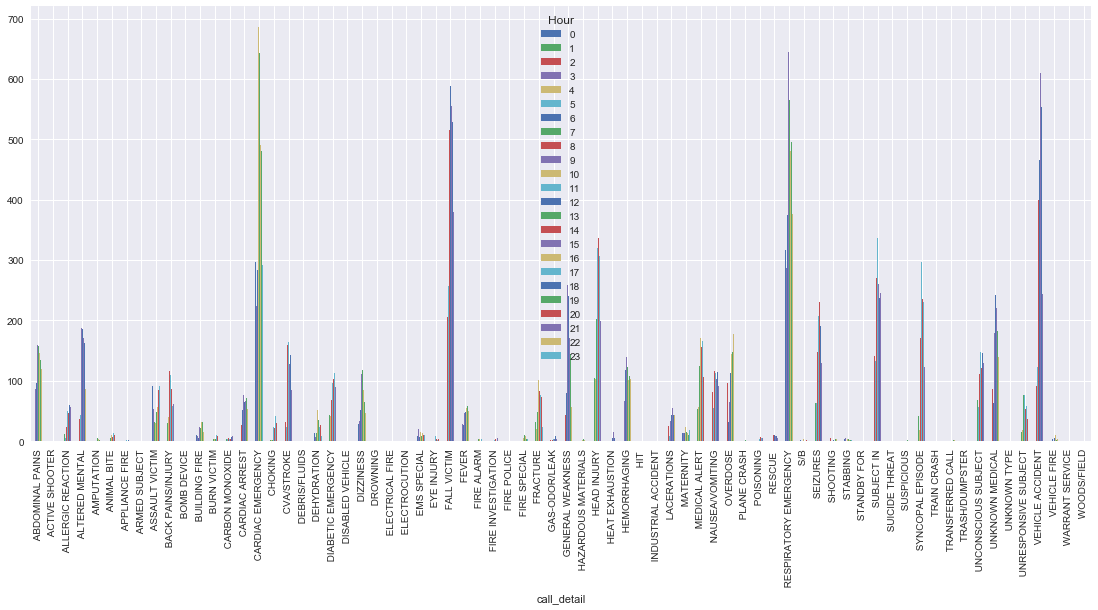

In [34]:
calls[calls.call_type == "EMS"].groupby("Hour").call_detail.value_counts().unstack().T.plot(kind = "bar", figsize = (19,8))

In [35]:
calls["hour_type"] = np.where(calls.Hour < 5,"MidNight",np.where((calls.Hour >=5)& (calls.Hour <12),"Morning",
                                                                np.where((calls.Hour >=12) &(calls.Hour <17),"AfterNoon","Evening")))

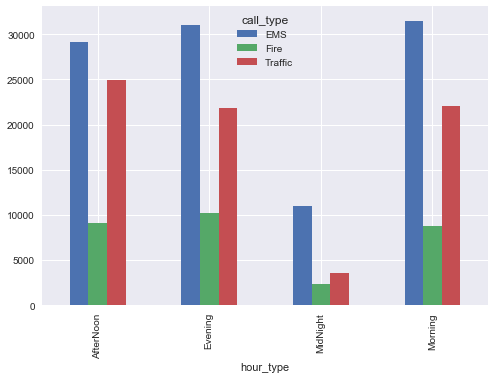

In [36]:
calls.groupby("hour_type").call_type.value_counts().unstack().plot(kind ="bar")

In [44]:
calls.groupby("hour_type").call_type.value_counts().unstack().sort_index()

call_type,EMS,Fire,Traffic
hour_type,,,
AfterNoon,29140,9091,24955
Evening,30979,10242,21880
MidNight,11002,2413,3555
Morning,31502,8807,22014


In [49]:
calls.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,call_type,call_detail,Month,Year,Hour,hour_type
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,12,2015,17,Evening
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,12,2015,17,Evening
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,12,2015,14,AfterNoon
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY,12,2015,16,AfterNoon
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS,12,2015,16,AfterNoon


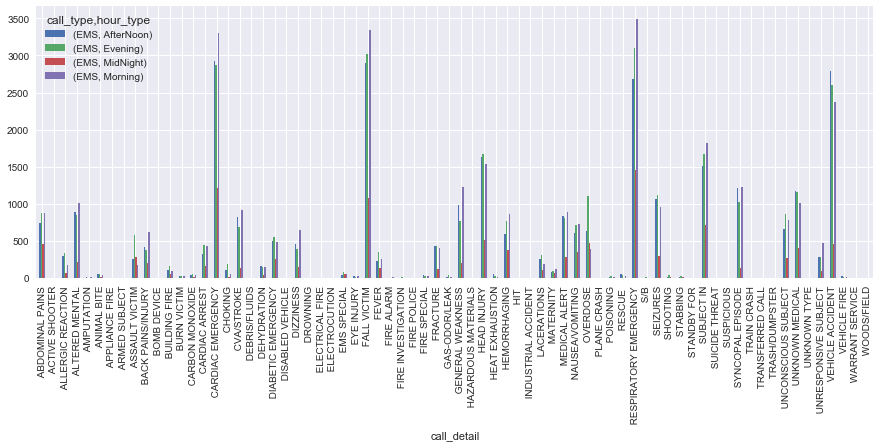

In [85]:
calls[calls.call_type == "EMS"].groupby(["call_type","hour_type"]).call_detail.value_counts().unstack().T.plot(kind ="bar",rot = 90,figsize = (15,5))